# Patch Analysis

In [59]:
# Imports
from importlib import reload

import numpy as np

import pandas
import seaborn as sns
from matplotlib import pyplot as plt
import scipy

from ulmo.plotting import plotting

import anly_patches

<module 'anly_patches' from '/home/xavier/Projects/Oceanography/python/ulmo/papers/MAE/Analysis/py/anly_patches.py'>

# Load the output file

In [45]:
f = np.load('mae_patches_t10_p20.npz')
list(f.keys())

['data', 'items']

In [46]:
data = f['data']
items = f['items']
items

array(['meanT', 'stdT', 'median_diff', 'std_diff', 'max_diff', 'i', 'j'],
      dtype='<U11')

In [47]:
data.shape

(10000, 52, 7)

## Reshape

In [48]:
data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))

# Table me

In [49]:
tbl = pandas.DataFrame(data, columns=items)
tbl.head()

,meanT,stdT,median_diff,std_diff,max_diff,i,j
0,0.565716,0.124143,-0.146675,0.079534,0.292810,0.0,40.0
1,0.732437,0.050911,-0.043529,0.045282,0.147853,0.0,44.0
2,-0.283329,0.032693,0.010058,0.007569,0.024012,4.0,0.0
3,-0.084868,0.017589,0.011065,0.005283,0.020870,4.0,16.0
4,0.820333,0.015397,0.000440,0.005214,0.008616,4.0,48.0


In [50]:
np.unique(tbl.i).size

16

# Plot something

## Binned stats

In [86]:
nbins = 16
#metric = 'abs_median_diff'
#metric = 'median_diff'
metric = 'std_diff'
#stat = 'median'
stat = 'mean'
#stat = 'std'

reload(anly_patches)
values, lbl = anly_patches.parse_metric(tbl, metric)

# Do it
median, x_edge, y_edge, ibins = scipy.stats.binned_statistic_2d(
    tbl.i, tbl.j, values,
        statistic=stat, expand_binnumbers=True, bins=[nbins,nbins])

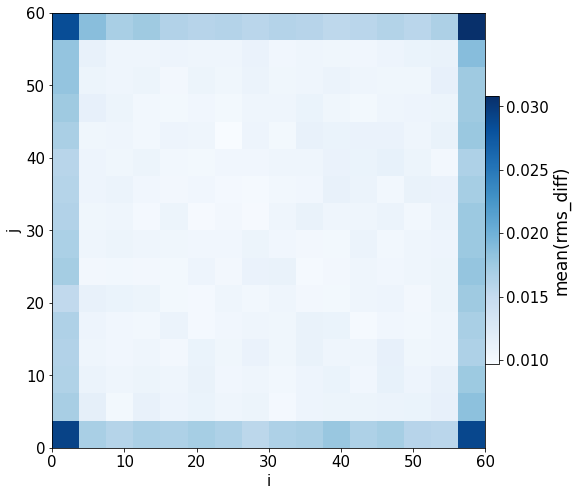

In [87]:
fig = plt.figure(figsize=(8, 8))
plt.clf()
ax = plt.gca()

cmap = 'Blues'
cm = plt.get_cmap(cmap)
mplt = ax.pcolormesh(x_edge, y_edge, 
                 median.transpose(),
                 cmap=cm, 
                 vmax=None) 
# Color bar
cbaxes = plt.colorbar(mplt, pad=0., fraction=0.030)
cbaxes.set_label(f'{stat}({lbl})', fontsize=17.)
cbaxes.ax.tick_params(labelsize=15)

# Axes
ax.set_xlabel(r'i')
ax.set_ylabel(r'j')

plotting.set_fontsize(ax, 15)

plt.show()

## Other patch properties: meanT, $\sigma$(T)

In [98]:
nbins = 32
#metric = 'abs_median_diff'
#metric = 'median_diff'
metric = 'log10_std_diff'
stat = 'median'
#stat = 'mean'
#stat = 'std'

x,y = 'meanT', 'stdT'

reload(anly_patches)
values, lbl = anly_patches.parse_metric(tbl, metric)

# Do it
median, x_edge, y_edge, ibins = scipy.stats.binned_statistic_2d(
    tbl[x], np.log10(tbl[y]), values,
        statistic=stat, expand_binnumbers=True, bins=[nbins,nbins])

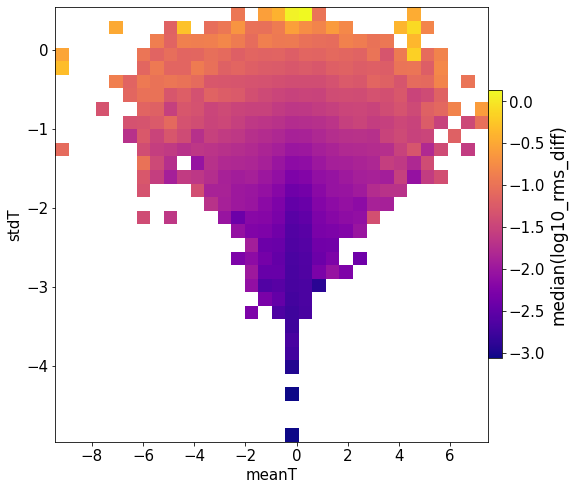

In [100]:
fig = plt.figure(figsize=(8, 8))
plt.clf()
ax = plt.gca()

cmap = 'plasma'
cm = plt.get_cmap(cmap)
mplt = ax.pcolormesh(x_edge, y_edge, 
                 median.transpose(),
                 cmap=cm, 
                 vmax=None) 
# Color bar
cbaxes = plt.colorbar(mplt, pad=0., fraction=0.030)
cbaxes.set_label(f'{stat}({lbl})', fontsize=17.)
cbaxes.ax.tick_params(labelsize=15)

# Axes
ax.set_xlabel(x)
ax.set_ylabel(y)

plotting.set_fontsize(ax, 15)

plt.show()

# One-D

In [116]:
reload(anly_patches)

nbins = 32
#metric = 'abs_median_diff'
#metric = 'median_diff'
metric = 'log10_std_diff'
stat = 'median'
#stat = 'mean'
#stat = 'std'

x_metric = 'log10_stdT'
xvalues, x_lbl = anly_patches.parse_metric(tbl, x_metric)

values, lbl = anly_patches.parse_metric(tbl, metric)

# Do it
eval_stats, x_edge, ibins = scipy.stats.binned_statistic(
    xvalues, values, statistic=stat, bins=nbins)

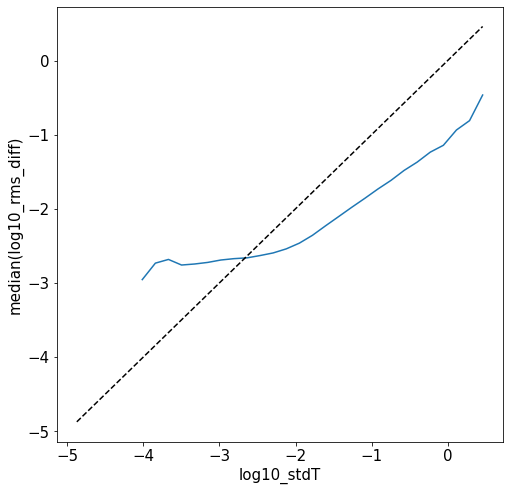

In [120]:
fig = plt.figure(figsize=(8, 8))
plt.clf()
ax = plt.gca()

plt_x = (x_edge[:-1]+x_edge[1:])/2
ax.plot(plt_x, eval_stats)

# Axes
ax.set_xlabel(x_lbl)
ax.set_ylabel(f'{stat}({lbl})')

plotting.set_fontsize(ax, 15)

# 1-1
ax.plot(plt_x, plt_x, 'k--')

plt.show()